We use Euler scheme to simulate a path for SDE of the form
$$X(t) = x_0 + \int_0^t \mu(X(s), s)ds + \int_0^t \sigma(X(s), s)dW(s).$$

__Ref__

[Hir13] Computational Methods in Finance

Section 6.6.1 of [Hir13] provides Euler schemem as follows:
One can produce a sequence of pairs $(t_j, \hat X_j): j = 0, 1, \ldots$ by
$$\hat X_{j+1} = \hat X_j + \mu(\hat X_j, t_j) \Delta t_j + \sigma(\hat X_j, t_j) \sqrt{\Delta t_j} Z_j,$$
where
$\Delta t_j = t_{j+1} - t_j$ and $(Z_j)_{j\ge 0}$ is iid standard normal variables.

We use P254-2-a of [Hir13] as an example.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define function Mu and Sigma
#Here we define as of P254-2-a of [Hir13] for the illustration
r = .0475; sig = .2
Mu = lambda x,t: r*x
Sigma = lambda x,t: sig*x
x0 = 100. #init state

In [3]:
from SDE_V01 import SDE

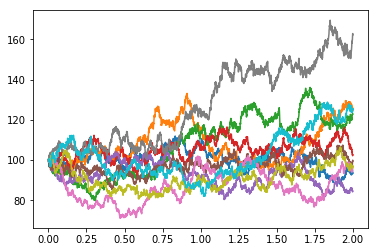

In [5]:
iGBM = SDE(Mu, Sigma, x0)
for i in range(10): 
    [t, Y] = iGBM.Euler(2., 4000); 
    plt.plot(t,Y);

In [10]:
#Use MC to compute the put price of p254-2-a
#first define a function of Put payoff
def PutPay(r, T, K, S_T):
    return np.exp(-r*T)*max(0,K-S_T)
T = 5.
K = 110.
MeshL = .005
MeshN = int(T/MeshL)
IterN = 100

iStk = SDE(Mu, Sigma, x0)

PPay = np.zeros(IterN) #Simulation of payoff

for i in range(IterN):
    [t, Xh] = iStk.Euler(T, MeshN);
    PPay[i] = PutPay(r, T, K, Xh[-1])
    
PPrice = PPay.mean()   

In [11]:
PPrice

9.734470966025436